In [7]:
import numpy as np
from graphviz import Digraph
from IPython.display import display, SVG


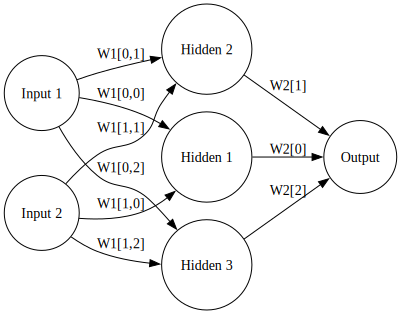

In [8]:
# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Define the neural network architecture
input_size = 2
hidden_size = 3
output_size = 1

# Initialize the weights
np.random.seed(1234)
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)


# Create a directed graph
dot = Digraph()

# Set the graph direction to left-to-right
dot.attr(rankdir='LR')

# Add input layer nodes
for i in range(input_size):
    dot.node(f'Input {i+1}', shape='circle')

# Add hidden layer nodes
for i in range(hidden_size):
    dot.node(f'Hidden {i+1}', shape='circle')

# Add output layer node
dot.node('Output', shape='circle')

# Connect input layer to hidden layer with weight indexes
for i in range(input_size):
    for j in range(hidden_size):
        dot.edge(f'Input {i+1}', f'Hidden {j+1}', label=f'W1[{i},{j}]')

# Connect hidden layer to output layer with weight indexes
for i in range(hidden_size):
    dot.edge(f'Hidden {i+1}', 'Output', label=f'W2[{i}]')


# Render the graph as SVG and display it
svg = dot.pipe(format='svg')
display(SVG(svg))

In [9]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network
learning_rate = 0.2
epochs = 1000000

for epoch in range(epochs):
    # Forward propagation
    # Step 1: Calculate the input to the hidden layer
    hidden_input = np.dot(X, W1)
    # Step 2: Apply the activation function (sigmoid) to the hidden layer input
    layer1 = sigmoid(hidden_input)
    
    # Step 3: Calculate the input to the output layer
    output_input = np.dot(layer1, W2)
    # Step 4: Apply the activation function (sigmoid) to the output layer input
    output = sigmoid(output_input)

    # Back propagation
    # Step 5: Calculate the error at the output layer
    output_error = y - output
    # Step 6: Calculate the gradient of the error with respect to the output (delta)
    output_delta = output_error * sigmoid_derivative(output)

    # Step 7: Calculate the error at the hidden layer
    layer1_error = output_delta.dot(W2.T)
    # Step 8: Calculate the gradient of the error with respect to the hidden layer (delta)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Update the weights
    # Step 9: Update the weights between the hidden layer and the output layer
    W2 += layer1.T.dot(output_delta) * learning_rate
    # Step 10: Update the weights between the input layer and the hidden layer
    W1 += X.T.dot(layer1_delta) * learning_rate


In [10]:
# Testing the trained model
test_input = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Step-by-step feedforward process
# Layer 1
layer1_input = np.dot(test_input, W1)
layer1_output = sigmoid(layer1_input)

# Layer 2 (Output Layer)
layer2_input = np.dot(layer1_output, W2)
predicted_output = sigmoid(layer2_input)

# Convert predictions to percentages
percented_output = predicted_output * 100

for i, prediction in enumerate(percented_output):
    rounded_output = round(predicted_output[i][0])
    print(f"Test: {test_input[i]} -> Predicted: {prediction[0]:.2f}% one (Rounded: {rounded_output})")


Test: [0 0] -> Predicted: 0.48% one (Rounded: 0)
Test: [0 1] -> Predicted: 99.25% one (Rounded: 1)
Test: [1 0] -> Predicted: 99.37% one (Rounded: 1)
Test: [1 1] -> Predicted: 0.60% one (Rounded: 0)
